# Task 2: Prediction using Unsupervised ML
<br/>
<br/>

### Problem Statement:
From the given **Iris** dataset, predict the optimum numbers of clusters and represent it visually.
<br/>
<br/>




### Author:  MD. Mehedi Hassan Galib  
Department of Civil Engineering  
Rajshahi University of Engineering and Technology (RUET)  
Rajshahi-6204, Bangladesh  
**Email**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**:**  galibmehedihassan@gmail.com  
**LinkedIn**&nbsp;&nbsp; **:** [Mehedi Hassan Galib](https://www.linkedin.com/in/mehedi-hassan-galib)  
**Kaggle**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **:** [Mehedi Hassan Galib](https://www.kaggle.com/galibce003)  
**Github**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**:** [Mehedi Hassan Galib](https://www.github.com/galibce003)  

<br/>
<br/>

## Table of Content
1. Importing necessary modules  
2. Load the dataset  
3. Reconnaissance   
5. Data Preparation  
4. Exploratory Data Analysis  
6. Finding the optimum numbers of clusters  
7. K-Means Clustering  
8. Hierarchical Clustering

<br/>

## 1. Importing necessary modules

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

<br/>

## 2. Load the dataset

In [55]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['species']=iris.target

<br/>

## 3. Reconnaissance

##### First few rows of the Dataset

In [56]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### shape of the dataset

In [58]:
df.shape

(150, 5)

##### Checking Null Values

In [59]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

##### Checking data types

In [60]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

<br/>

## 4. Data Preparation

##### Splitting explanatory and response variable

In [62]:
X = df.iloc[:, [0, 1, 2,3]].values
y = df['species']
y = np.array(iris_Y)

<br/>

## 5. Exploratory Data Analysis

#### pairplot

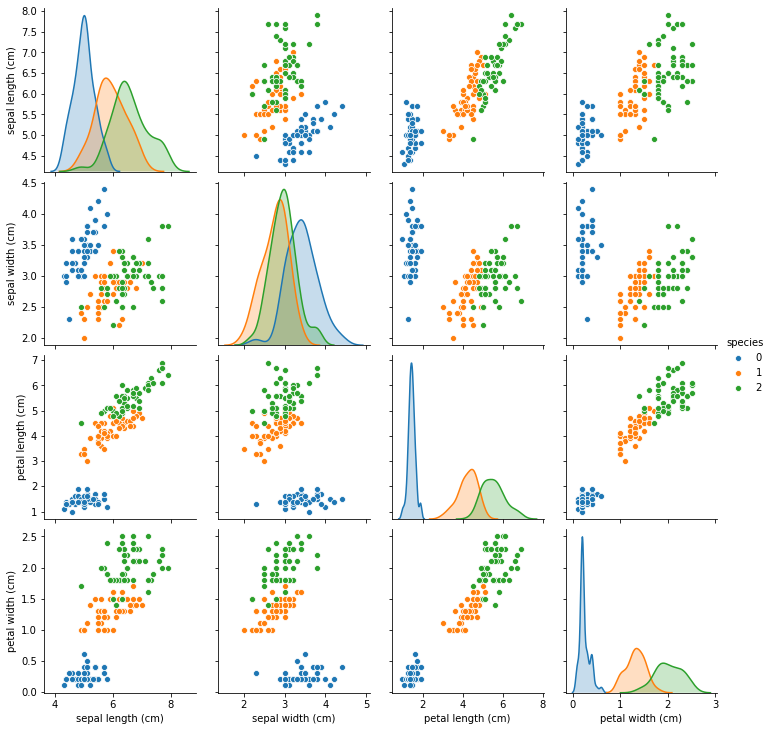

In [57]:
sns.pairplot(df, hue = 'species')
plt.show()

<br/>

#### Visualize the Iris Dataset

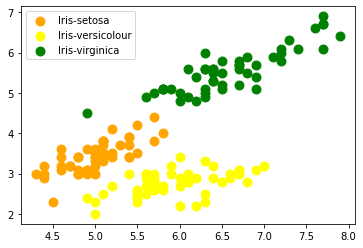

In [65]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')

plt.legend()
plt.show()

<br/>

## 6. Finding the optimum numbers of clusters

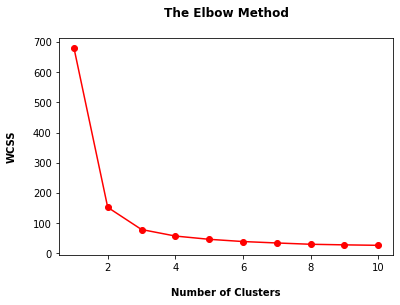

In [66]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss, color = 'red', marker = 'o')
plt.title('The Elbow Method\n', fontweight='bold')
plt.xlabel('\nNumber of Clusters', fontweight='bold')
plt.ylabel('WCSS\n', fontweight='bold')
plt.show()

<br/>

## 7. K-Means Clustering

#### MODEL BUILD UP

In [67]:
km = KMeans(n_clusters=3)
model1 = km.fit(X)

pred_kmeans = model1.labels_
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### VISUALIZATION

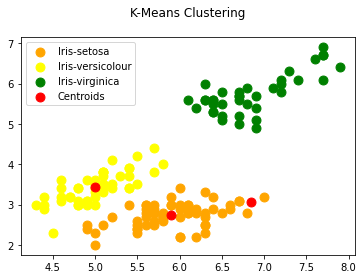

In [69]:
plt.scatter(X[pred_kmeans == 0, 0], X[pred_kmeans == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')

#Centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')

plt.title('K-Means Clustering\n')
plt.legend()
plt.show()

<br/>

## 8. Hierarchical Clustering

#### Dendogram

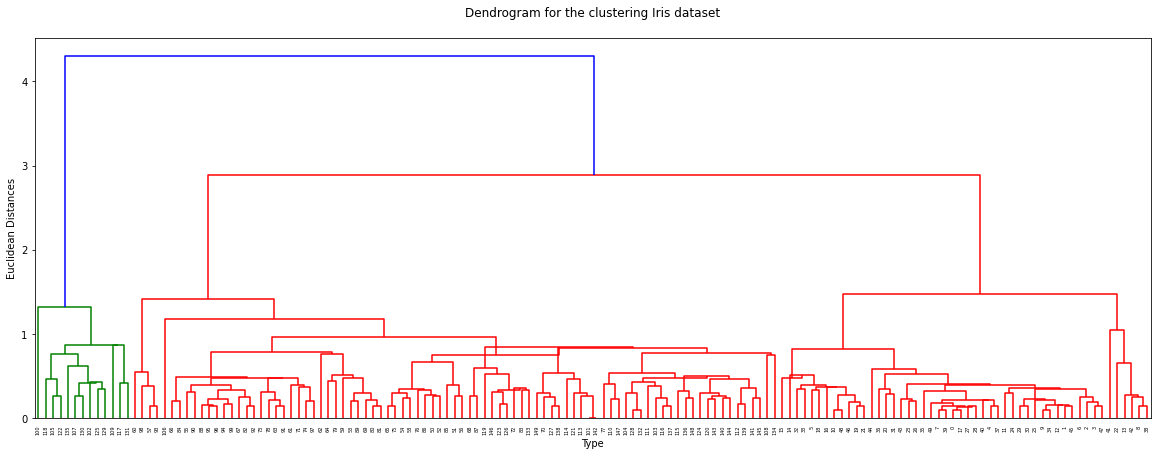

In [77]:
Z = sch.linkage(X, method = 'median')

plt.figure(figsize=(20,7))

# Dendogram
den = sch.dendrogram(Z)

plt.title('Dendrogram for the clustering Iris dataset\n')
plt.xlabel('Type')
plt.ylabel('Euclidean Distances')
plt.show()

#### Model Build UP

In [78]:
H_cl = AgglomerativeClustering(n_clusters=3)
model2 = H_cl.fit(X)

pred_hcl = model_clt.labels_
pred_hcl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

#### Visualization

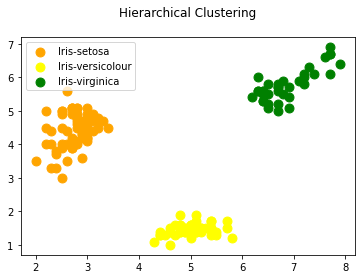

In [79]:
plt.scatter(iris_X[pred1 == 0, 1], iris_X[pred1 == 0, 2], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred1 == 1, 0], iris_X[pred1 == 1, 2], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred1 == 2, 0], iris_X[pred1 == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')

plt.title('Hierarchical Clustering\n')
plt.legend()
plt.show()